## The double pendulum problem

This post is based on [an example of matplotlib](https://matplotlib.org/stable/gallery/animation/double_pendulum.html).

## Code

In [ ]:
import scipy
import numpy as np
from numpy import cos, sin

import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [ ]:
def pendulum(t, u, M1, M2, L1, L2, G):
    # u[0] = theta1
    # u[1] = omega1
    # u[2] = theta2
    # u[3] = omega2
    
    du = np.zeros_like(u)

    du[0] = u[1]
    
    delta = u[2] - u[0]
    den1 = (M1 + M2) * L1 - M2 * L1 * cos(delta) * cos(delta)
    du[1] = (
        (
            M2 * L1 * u[1] * u[1] * sin(delta) * cos(delta) + 
            M2 * G * sin(u[2]) * cos(delta) + 
            M2 * L2 * u[3] * u[3] * sin(delta) - (M1 + M2) * G * sin(u[0])
        ) / den1
    )
    
    du[2] = u[3]

    den2 = (L2 / L1) * den1
    du[3] = (
        (
            -M2 * L2 * u[3] * u[3] * sin(delta) * cos(delta) + 
            (M1 + M2) * G * sin(u[0]) * cos(delta) - 
            (M1 + M2) * L1 * u[1] * u[1] * sin(delta) - (M1 + M2) * G * sin(u[2])
        ) / den2
    )
    
    return du

In [ ]:
G = 9.8      # acceleration due to gravity, in m/s^2
L1 = 1.0     # length of pendulum 1 in m
L2 = 1.0     # length of pendulum 2 in m
L = L1 + L2  # maximal length of the combined pendulum
M1 = 1.0     # mass of pendulum 1 in kg
M2 = 1.0     # mass of pendulum 2 in kg
t_stop = 5.0   # how many seconds to simulate

In [ ]:
# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

In [ ]:
u0 = np.radians([th1, w1, th2, w2])
u0

array([ 2.0943951 ,  0.        , -0.17453293,  0.        ])

In [ ]:
p = (M1, M2, L1, L2, G)
p

(1.0, 1.0, 1.0, 1.0, 9.8)

In [ ]:
tspan = (0.0, t_stop)
tspan

(0.0, 5.0)

In [ ]:
res = %timeit -o scipy.integrate.solve_ivp(pendulum, tspan, u0, args=p, dense_output=True, \
                                        method='DOP853', rtol=1e-10, atol=1e-10)

63.3 ms ± 839 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
print(f"{res.best:.6f} seconds")

0.062364 seconds


In [ ]:
sol = scipy.integrate.solve_ivp(pendulum, tspan, u0, args=p, dense_output=True, \
                                        method='DOP853', rtol=1e-10, atol=1e-10)

In [ ]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.553e-02 ...  4.985e+00  5.000e+00]
        y: [[ 2.094e+00  2.091e+00 ... -3.871e-01 -4.402e-01]
            [ 0.000e+00 -2.555e-01 ... -3.738e+00 -3.521e+00]
            [-1.745e-01 -1.761e-01 ...  7.104e+00  7.050e+00]
            [ 0.000e+00 -1.201e-01 ... -3.549e+00 -3.909e+00]]
      sol: <scipy.integrate._ivp.common.OdeSolution object>
 t_events: None
 y_events: None
     nfev: 4004
     njev: 0
      nlu: 0

In [ ]:
t = np.linspace(0, t_stop, 500)
t.shape

(500,)

In [ ]:
s = sol.sol(t)
s

array([[ 2.0943951 ,  2.09389273,  2.09238573, ..., -0.36666802,
        -0.40417351, -0.44021975],
       [ 0.        , -0.10027181, -0.20051768, ..., -3.81247888,
        -3.6719432 , -3.52113898],
       [-0.17453293, -0.17477032, -0.1754812 , ...,  7.12298826,
         7.08752942,  7.04957895],
       [ 0.        , -0.04736169, -0.09446566, ..., -3.41150939,
        -3.66460357, -3.90882817]])

In [ ]:
s.shape

(4, 500)

In [ ]:
# theta1
s[0, :] 

array([ 2.0943951 ,  2.09389273,  2.09238573,  2.08987451,  2.08635972,
        2.08184231,  2.07632352,  2.0698049 ,  2.06228836,  2.05377617,
        2.04427099,  2.03377593,  2.02229454,  2.00983085,  1.99638943,
        1.98197535,  1.96659427,  1.95025238,  1.93295643,  1.91471374,
        1.89553213,  1.8754199 ,  1.85438575,  1.83243875,  1.80958814,
        1.78584331,  1.76121353,  1.73570785,  1.70933481,  1.68210224,
        1.6540169 ,  1.62508422,  1.59530785,  1.5646893 ,  1.53322745,
        1.500918  ,  1.46775295,  1.43371989,  1.39880128,  1.36297364,
        1.32620657,  1.28846171,  1.24969137,  1.20983715,  1.1688281 ,
        1.12657866,  1.08298619,  1.03792806,  0.99125831,  0.94280406,
        0.89236193,  0.83969567,  0.78453699,  0.72659457,  0.66557999,
        0.60126609,  0.53359691,  0.46285337,  0.38981596,  0.31576919,
        0.2422171 ,  0.17044198,  0.10122448,  0.03485021, -0.02872957,
       -0.08973502, -0.14844932, -0.20516057, -0.26013525, -0.31

In [ ]:
# u[0] = theta1
# u[1] = omega1
# u[2] = theta2
# u[3] = omega2

x1 = +L1 * sin(s[0, :])
y1 = -L1 * cos(s[0, :])

x2 = +L2 * sin(s[2, :]) + x1
y2 = -L2 * cos(s[2, :]) + y1

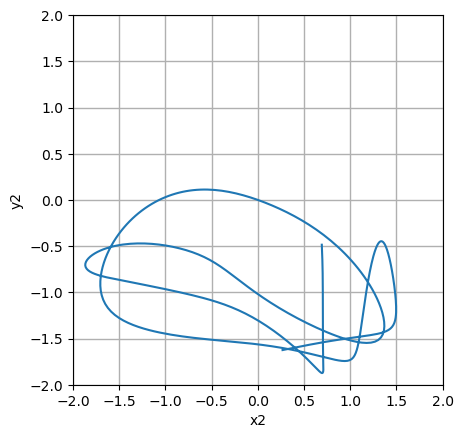

In [ ]:
plt.plot(x2, y2)
plt.grid(linewidth=1)
plt.gca().set_aspect("equal")
plt.xlabel("x2")
plt.ylabel("y2")
plt.xlim((-2.0, 2.0))
plt.ylim((-2.0, 2.0))
plt.show()

In [ ]:
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(autoscale_on=False, xlim=(-L, L), ylim=(-L, 1.))
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2, markerfacecolor="red", markeredgecolor="black")
trace, = ax.plot([], [], '.-', lw=1, ms=2)
time_template = 'time = %.1f s'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def animate(i):
    this_x = [0, x1[i], x2[i]]
    this_y = [0, y1[i], y2[i]]
    
    history_x = x2[:i]
    history_y = y2[:i]
    
    line.set_data(this_x, this_y)
    trace.set_data(history_x, history_y)
    time_text.set_text(time_template % (t[i]))
    return line, trace, time_text

n = len(x1)
frames = np.arange(0, n, 10)
ani = animation.FuncAnimation(fig, animate, frames, blit=True)

In [ ]:
ani.save("ani_python.mp4", fps=10)

{{< video https://www.youtube.com/watch?v=RePgj5DMuLQ >}}